<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score
950,male,group E,high school,standard,none,94,73,71,238
951,female,group D,some college,standard,completed,75,77,83,235
952,female,group E,some high school,free/reduced,none,74,74,72,220
953,male,group C,high school,standard,completed,58,52,54,164
954,female,group C,some college,standard,none,62,69,69,200
955,male,group E,associate's degree,standard,none,72,57,62,191
956,male,group C,some college,standard,none,84,87,81,252
957,female,group D,master's degree,standard,none,92,100,100,292
958,female,group D,high school,standard,none,45,63,59,167
959,male,group C,high school,standard,none,75,81,71,227


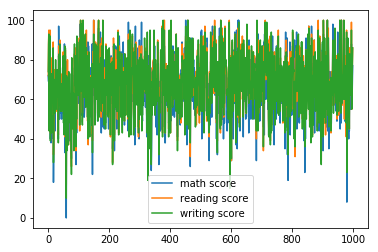

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


#read the data

data = pd.read_csv(r'C:\Users\francis\Downloads\StudentsPerformance.csv')

#data cleaning

data.plot()

data.info()

data.isnull().sum

data['Total score'] = data['math score']+data['reading score']+data['writing score']

data.head(25)

data.tail(50)

In [2]:
data['Total score'].mean()

203.312

In [3]:
data.mean()

math score        66.089
reading score     69.169
writing score     68.054
Total score      203.312
dtype: float64

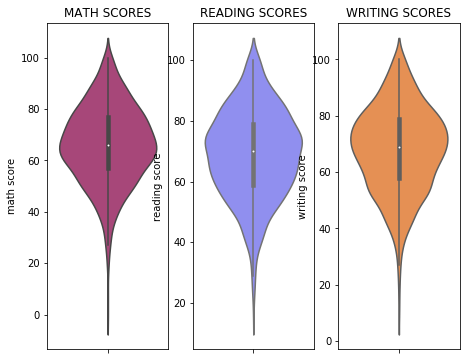

In [9]:
plt.figure(figsize=(10,6))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,palette='magma')
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,palette='cool')
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,palette='YlOrRd')
plt.show()

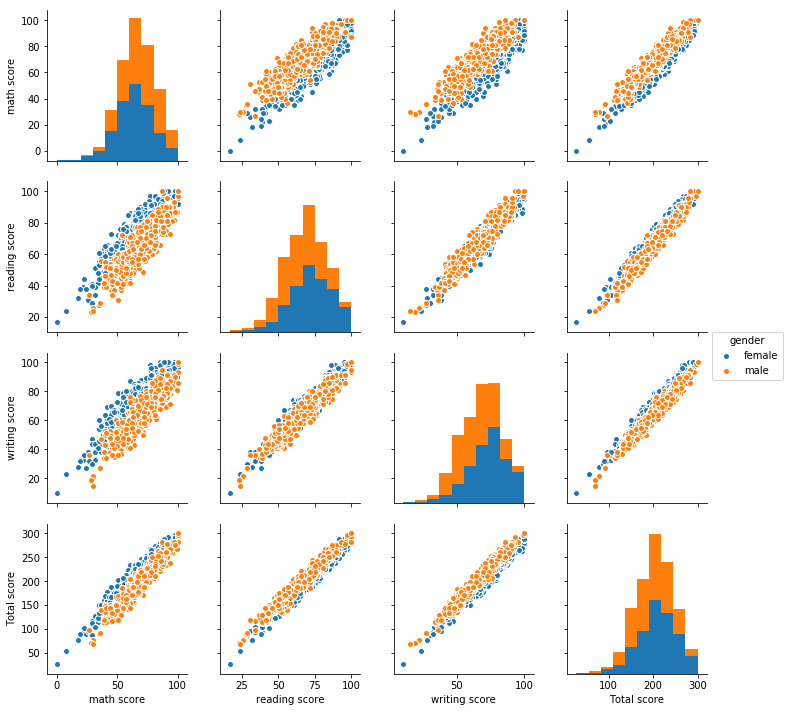

In [10]:
sns.pairplot(data=data,hue='gender')


In [14]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total score                    0
dtype: int64

In [15]:
data  = data.drop(['test preparation course','lunch','parental level of education'], axis =1)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
gender            1000 non-null object
race/ethnicity    1000 non-null object
math score        1000 non-null int64
reading score     1000 non-null int64
writing score     1000 non-null int64
Total score       1000 non-null int64
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [17]:
X = data.iloc[:,:-1].values

In [18]:
y = data.iloc[:,5].values

In [26]:
#Encoding categorical data 

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder(categorical_features = [0])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

In [27]:
X

array([[ 1.,  0.,  1., ..., 72., 72., 74.],
       [ 1.,  0.,  1., ..., 69., 90., 88.],
       [ 1.,  0.,  1., ..., 90., 95., 93.],
       ...,
       [ 1.,  0.,  1., ..., 59., 71., 65.],
       [ 1.,  0.,  1., ..., 68., 78., 77.],
       [ 1.,  0.,  1., ..., 77., 86., 86.]])

In [28]:
data

,gender,race/ethnicity,math score,reading score,writing score,Total score
0,female,group B,72,72,74,218
1,female,group C,69,90,88,247
2,female,group B,90,95,93,278
3,male,group A,47,57,44,148
4,male,group C,76,78,75,229
5,female,group B,71,83,78,232
6,female,group B,88,95,92,275
7,male,group B,40,43,39,122
8,male,group D,64,64,67,195
9,female,group B,38,60,50,148


In [29]:
#splitting the dataset
from sklearn import linear_model

from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
regr = linear_model.LinearRegression().fit(X_train,y_train)

In [34]:
regr.coef_



array([ 4.28389787e-15, -4.57186752e-15,  4.23346662e-15,  2.35243489e-15,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

In [33]:
regr.intercept_

2.842170943040401e-14

In [35]:
predt = regr.predict(X_test)

In [36]:
regr.score(X_test,y_test)

1.0

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
